In [111]:
import pandas as pd
import numpy as np
import csv
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [112]:
def load_data(pathfile,headers = None):
    data = pd.read_csv(pathfile, header=headers)
    data = data.to_numpy()
    return data

In [113]:
pems08 = load_data("data/pems08_adj.csv")
lossloop = load_data("data/los_adj.csv")
taxi = load_data("data/sz_adj.csv")
pems04 = load_data("data/pems04_adj.csv")

In [114]:
pems08

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
class SelfAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim=None):
        super().__init__()

        if hidden_dim is None:
            hidden_dim = input_dim

        self.query = nn.Linear(input_dim, hidden_dim, bias=False)
        self.key = nn.Linear(input_dim, hidden_dim, bias=False)
        self.value = nn.Linear(input_dim, hidden_dim, bias=False)

        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)

        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(K.shape[-1], dtype=torch.float32))

        attention_weights = self.softmax(attention_scores)

        output = torch.matmul(attention_weights, V)

        return output


In [88]:
def get_attention_adj_matrix(adj_matrix):
    dims = adj_matrix.shape[0]
    adj_tensor = torch.tensor(adj_matrix, dtype=torch.float32)
    self_attention = SelfAttention(input_dim=dims, hidden_dim=dims)
    output = self_attention(adj_tensor)
    output = output.detach().numpy()
    return output

In [89]:
pems08_at = get_attention_adj_matrix(pems08)
losloop_at = get_attention_adj_matrix(lossloop)
sz_taxi_at = get_attention_adj_matrix(taxi)
pems04_at = get_attention_adj_matrix(pems04)

In [90]:
#np.savetxt("sz_taxi_attention.csv",sz_taxi, delimiter=',')

In [91]:
q = nn.Linear(170,170)

In [92]:
qq = q(torch.tensor(pems08, dtype=torch.float32))

In [93]:
k = nn.Linear(170,170)

In [94]:
kk = k(torch.tensor(pems08, dtype=torch.float32))

In [95]:
v = nn.Linear(170,170)

In [96]:
vv = v(torch.tensor(pems08, dtype=torch.float32))

In [97]:
pp = torch.matmul(qq, kk.transpose(-2, -1)) / torch.sqrt(torch.tensor(kk.shape[-1], dtype=torch.float32))

In [98]:
pp

tensor([[-0.0002, -0.0006, -0.0016,  ..., -0.0024, -0.0022, -0.0036],
        [ 0.0002,  0.0009,  0.0005,  ...,  0.0010, -0.0020, -0.0030],
        [-0.0017, -0.0004, -0.0025,  ..., -0.0099, -0.0066, -0.0075],
        ...,
        [ 0.0018,  0.0020,  0.0070,  ...,  0.0035,  0.0036, -0.0113],
        [ 0.0001,  0.0014,  0.0061,  ...,  0.0022,  0.0051, -0.0016],
        [ 0.0036, -0.0036, -0.0030,  ...,  0.0059, -0.0023,  0.0040]],
       grad_fn=<DivBackward0>)

In [99]:
ss = nn.Softmax(dim=-1)
oo = ss(pp)

In [100]:
oo

tensor([[0.0059, 0.0059, 0.0059,  ..., 0.0059, 0.0059, 0.0059],
        [0.0059, 0.0059, 0.0059,  ..., 0.0059, 0.0059, 0.0059],
        [0.0059, 0.0059, 0.0059,  ..., 0.0058, 0.0059, 0.0059],
        ...,
        [0.0059, 0.0059, 0.0059,  ..., 0.0059, 0.0059, 0.0058],
        [0.0059, 0.0059, 0.0059,  ..., 0.0059, 0.0059, 0.0059],
        [0.0059, 0.0058, 0.0058,  ..., 0.0059, 0.0059, 0.0059]],
       grad_fn=<SoftmaxBackward0>)

In [101]:
ot = torch.matmul(oo, vv)

In [102]:
ott = ot.detach().numpy()

In [103]:
ott

array([[-0.05891791,  0.06368904,  0.00210786, ...,  0.04573653,
        -0.00452543, -0.02467143],
       [-0.05889793,  0.06367473,  0.00211713, ...,  0.04573163,
        -0.00453748, -0.02466944],
       [-0.0589144 ,  0.06368562,  0.00212555, ...,  0.04574513,
        -0.00452964, -0.02465845],
       ...,
       [-0.0589053 ,  0.06366976,  0.00212986, ...,  0.04575474,
        -0.00449136, -0.02474289],
       [-0.05893403,  0.06370669,  0.00207862, ...,  0.04573473,
        -0.00455878, -0.02462578],
       [-0.05892126,  0.06368408,  0.00209508, ...,  0.0457282 ,
        -0.00453036, -0.0246889 ]], dtype=float32)

In [104]:
import networkx as nx 

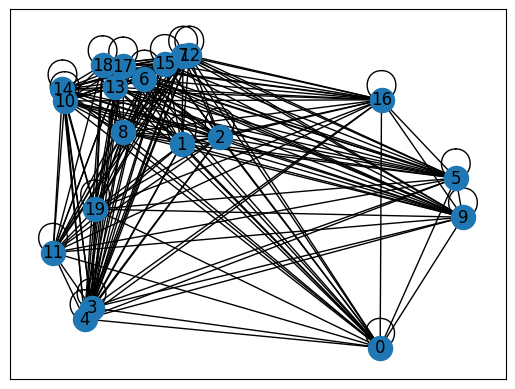

In [105]:
G = nx.from_numpy_array(np.array(np.array(ott[:20,:20])))
nx.draw_networkx(G, with_labels=True)

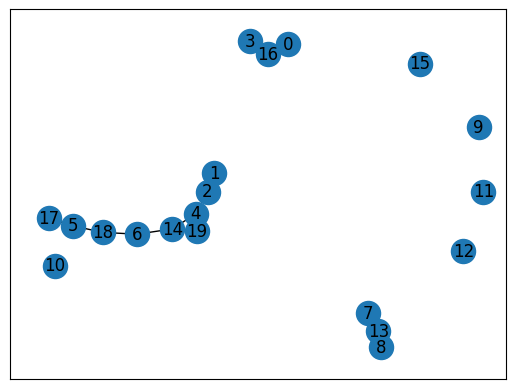

In [106]:
G1 = nx.from_numpy_array(np.array(np.array(pems08[:20,:20])))
nx.draw_networkx(G1, with_labels=True)

In [107]:
import seaborn as sns
A = nx.adjacency_matrix(G)
AA = A.todense()

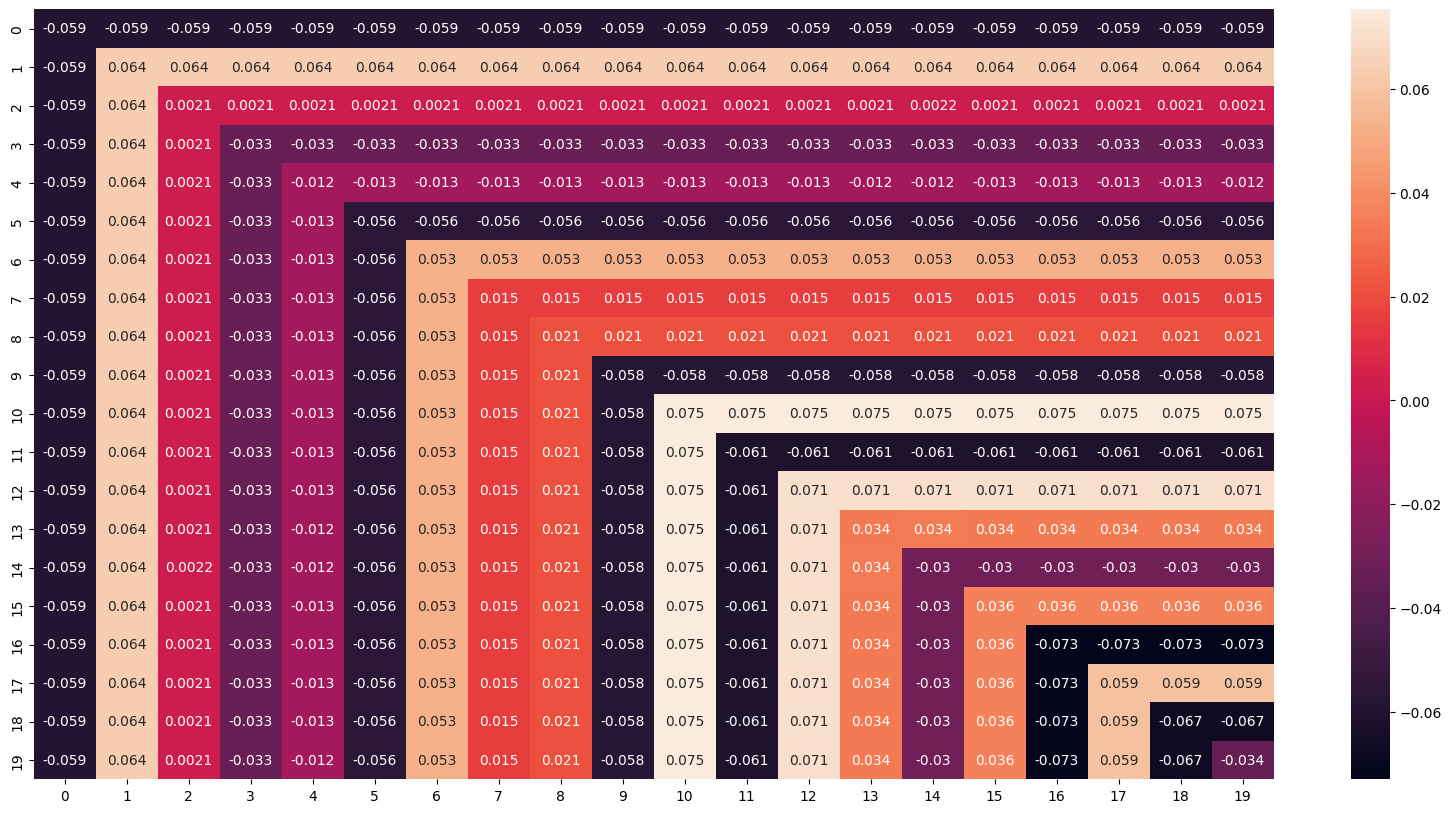

In [108]:
plt.figure(figsize=(20,10))
sns.heatmap(AA,annot=True)
#plt.savefig("adjeceny_matrix.png")
plt.show()

In [109]:
A1 = nx.adjacency_matrix(G1)
AA1 = A1.todense()

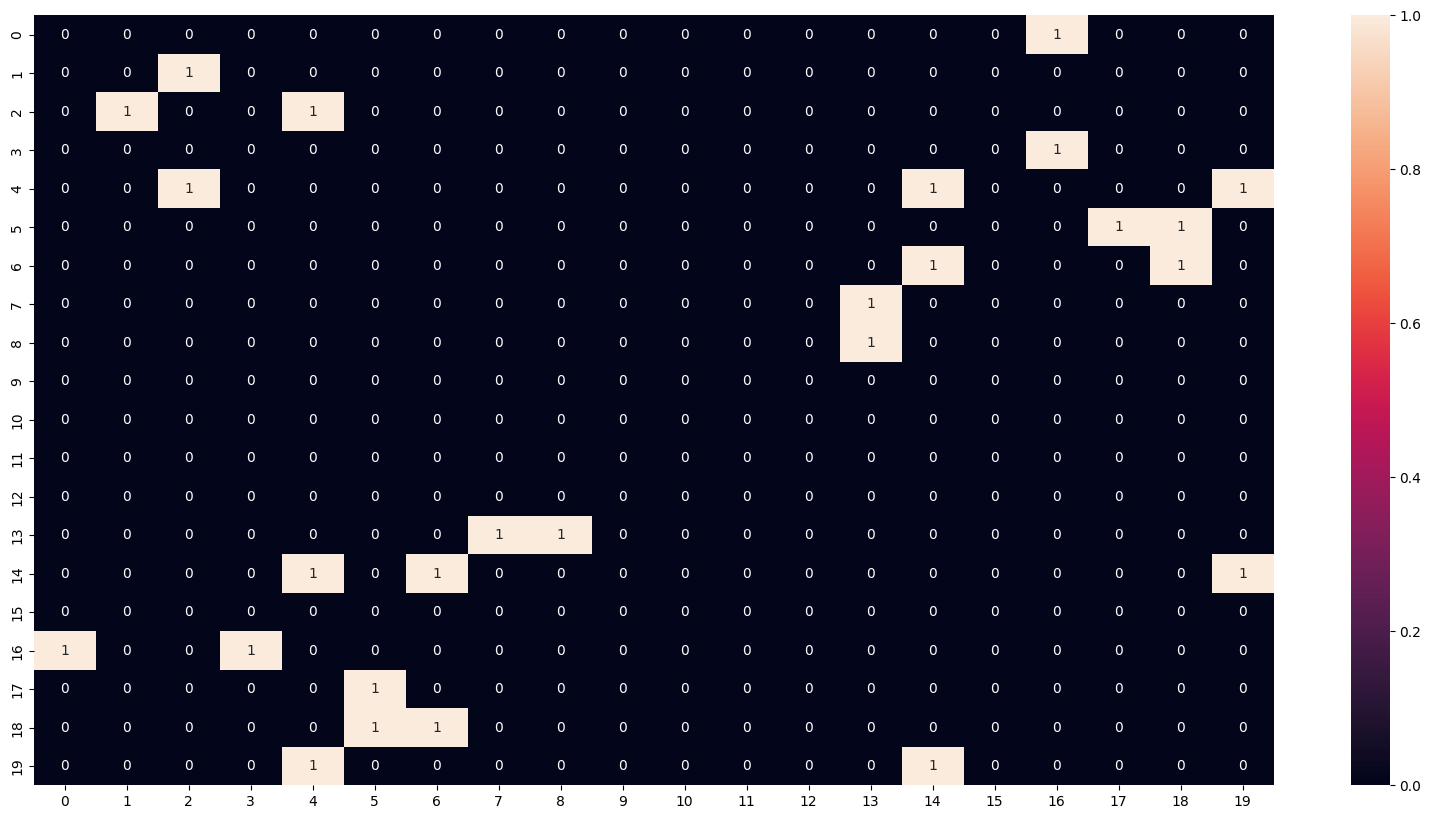

In [110]:
plt.figure(figsize=(20,10))
sns.heatmap(AA1,annot=True)
#plt.savefig("adjeceny_matrix.png")
plt.show()

self-attention mechanisms can also be used to enhance the node features before feeding them into a GCN as input. This way, the self-attention layer can learn a representation of each node based on its features and the features of its neighbors.
One common approach is to use a self-attention layer to compute a weighted sum of the node features, where the weights are learned based on the similarity between the nodes. The resulting weighted sum can then be concatenated with the original node features and fed into the GCN layer.